# TO DO
- example pictures to support results
    - experiment 2: images not recognized at all - always like that?
- explorative analysis
    - due to the novelty of the field
    
Experiment 1:

Experiment 2:
- Table with percentage differences among models and classes (+, 0, -)

In [493]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Krippendorff's Alpha
import simpledorff

from scipy.stats import chisquare
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [504]:
# Experiment 1 preprocessing of data
def preprocess_experiment1_results(path):
    data = pd.read_csv(path)
    columns = ['HITId', 'WorkerId', 'Input.image_url', 'Answer.algorithms.alg1', 'Answer.algorithms.alg2', 'Answer.algorithms.none']
    data = data[columns]
    
    # Extract the img_id, image_class and algorithms of the image_url
    data['img_id'] = data['Input.image_url'].str.split('_').apply(lambda x: x[0])
    data['img_class'] = data['Input.image_url'].str.split('_').apply(lambda x: x[2])
    data['alg1'] = data['Input.image_url'].str.split('_').apply(lambda x: x[1])
    data['alg2'] = data['Input.image_url'].str.split('_').apply(lambda x: x[3].split('.')[0])
    
    # Get all answers, where nonpruned was voted as more reasonable and set a new column 'nonpruned' to 1 for those cases, the others get 0
    data.loc[((data['Answer.algorithms.alg1'] == True) & (data['alg1'] == 'nonpruned') |
              (data['Answer.algorithms.alg2'] == True) & (data['alg2'] == 'nonpruned')), 'nonpruned'] = 1
    data['nonpruned'].fillna(0, inplace=True)
    
    # Get all answers, where 2pruned was voted as more reasonable and set a new column '2pruned' to 1 for those cases, the others get 0
    data.loc[((data['Answer.algorithms.alg1'] == True) & (data['alg1'] == '2pruned') |
              (data['Answer.algorithms.alg2'] == True) & (data['alg2'] == '2pruned')), '2pruned'] = 1
    data['2pruned'].fillna(0, inplace=True)
    
    # Get all answers, where 32pruned was voted as more reasonable and set a new column '32pruned' to 1 for those cases, the others get 0
    data.loc[((data['Answer.algorithms.alg1'] == True) & (data['alg1'] == '32pruned') |
              (data['Answer.algorithms.alg2'] == True) & (data['alg2'] == '32pruned')), '32pruned'] = 1
    data['32pruned'].fillna(0, inplace=True)
    
    data.loc[data['Answer.algorithms.alg1']==True, 'annotation_result'] = 'alg1'
    data.loc[data['Answer.algorithms.alg2']==True, 'annotation_result'] = 'alg2'
    data.loc[data['Answer.algorithms.none']==True, 'annotation_result'] = 'none'
    
    return data

# Experiment 1 - Class-Specific Image Parts 
This experiment investigates the reasonability of algorithms when they classify images. You will decide which of the algorithms makes a more reasonable decision based on the parts of the image it uses for its decision.

This experiment investigates the reasonability of algorithms when they classify images.
The image in the middle is the original image with its predicted class shown above the image.
The images on the left and right show only parts of the image that seem most important to the algorithm.
You will decide which of the algorithms makes a more reasonable decision based on the parts of the image it uses for its decision.
If you think that none of the algorithms seems more reasonable than the other, select "Both algorithms seem equally reasonable".

Some rows not filled with any '1' show that "Both algorithms equally reasonable" were chosen. These are ignored / left for now.
- Maybe they should be removed?
- Somehow put into the calculation / test later on?

In [505]:
# Load and pre-process CSV
occ_results = preprocess_experiment1_results('experiments/experiment1-7500-results.csv')
occ_results.head(5)

,HITId,WorkerId,Input.image_url,Answer.algorithms.alg1,Answer.algorithms.alg2,Answer.algorithms.none,img_id,img_class,alg1,alg2,nonpruned,2pruned,32pruned,annotation_result
0,3GITHABAD67H76AWTVB589IP4QCN29,A3A1PY8GLGYRR5,167_32pruned_2-cassetteplayer_nonpruned.png,False,False,True,167,2-cassetteplayer,32pruned,nonpruned,0.0,0.0,0.0,none
1,3D4BBDG70PIN1K9O85GWB8T5B0Y3CI,AV5TLLCULVF0P,8_2pruned_2-cassetteplayer_nonpruned.png,False,True,False,8,2-cassetteplayer,2pruned,nonpruned,1.0,0.0,0.0,alg2
2,3Z56AA6ELCMZ7P8X4W88L7A1F556MA,A250KKS1WKKUFY,360_2pruned_4-church_nonpruned.png,False,False,True,360,4-church,2pruned,nonpruned,0.0,0.0,0.0,none
3,3OKP4QVBQAJ02HOEJ6RPO7SQF2IAGV,A2U9OZCL9ULYLZ,235_32pruned_8-golfball_nonpruned.png,False,False,True,235,8-golfball,32pruned,nonpruned,0.0,0.0,0.0,none
4,36FQTHX30BD4RFHIU5K10ONNTFY3BB,A3NXNCQ5PD9LO2,62_32pruned_3-chainsaw_nonpruned.png,False,False,True,62,3-chainsaw,32pruned,nonpruned,0.0,0.0,0.0,none


In [506]:
# Interannotator Agreement
simpledorff.calculate_krippendorffs_alpha_for_df(occ_results,
                                                 experiment_col='Input.image_url',
                                                 annotator_col='WorkerId',
                                                 class_col='annotation_result')

0.23585289563692424

In [365]:
# How many datapoints
len(occ_results)

7500

In [543]:
# Maximum 3 options: alg1, alg2, none
occ_results[occ_results['Input.image_url'].apply(lambda x: 167_32pruned_2-cassetteplayer_nonpruned.png']['annotation_result'].value_counts()

alg1    3
none    2
Name: annotation_result, dtype: int64

In [555]:
#Value Counts of Answers based on image_url
occ_results['Input.image_url'].apply(lambda x: occ_results.loc[occ_results['Input.image_url']==x]['annotation_result'].value_counts())

,alg1,none,alg2
0,3.0,2.0,NaN
1,3.0,1.0,1.0
2,1.0,3.0,1.0
3,2.0,3.0,NaN
4,2.0,1.0,2.0
...,...,...,...
7495,3.0,NaN,2.0
7496,3.0,NaN,2.0
7497,3.0,NaN,2.0
7498,3.0,NaN,2.0


In [ ]:
# Img IDs where Turkers agree least often (maximum 15)
occ_results.loc[occ_results['img_id'].apply(lambda x: len(occ_results.loc[(occ_results['img_id']==x) & (occ_results['img_class']==occ_results['img_answer'])])) <= 5]['Input.image_url'].unique()

In [366]:
# How often did the models appear - expected: all of them same occurance
occ_results['alg1'].value_counts(normalize=True) + occ_results['alg2'].value_counts(normalize=True)

2pruned      0.666667
32pruned     0.666667
nonpruned    0.666667
dtype: float64

In [367]:
# 'Both algorithms equally reasonable'
occ_results['Answer.algorithms.none'].value_counts(normalize=True)

False    0.660667
True     0.339333
Name: Answer.algorithms.none, dtype: float64

In [389]:
# 'Both equally' grouped by Class
occ_results.loc[occ_results['Answer.algorithms.none'] == True]['img_class'].value_counts()

5-frenchhorn        385
8-golfball          330
0-fish              281
7-gaspump           274
3-chainsaw          247
6-garbagetruck      228
2-cassetteplayer    227
9-parachute         205
1-dog               197
4-church            171
Name: img_class, dtype: int64

### 2Pruned VS Non-Pruned

In [375]:
# Compare non-pruned VS 2pruned
occ_results_np_2 = occ_results.loc[((occ_results['alg1'] == '2pruned') | (occ_results['alg2'] == '2pruned')) & ((occ_results['alg1'] == 'nonpruned') | (occ_results['alg2'] == 'nonpruned'))]
len(occ_results_np_2)

2500

In [376]:
# 'Both algorithms equally reasonable'
occ_results_np_2['Answer.algorithms.none'].value_counts(normalize=True), occ_results_np_2['Answer.algorithms.none'].value_counts()

(True     0.5372
 False    0.4628
 Name: Answer.algorithms.none, dtype: float64,
 True     1343
 False    1157
 Name: Answer.algorithms.none, dtype: int64)

In [385]:
# 'Both equally' grouped by Class
occ_results_np_2.loc[occ_results_np_2['Answer.algorithms.none'] == True]['img_class'].value_counts()

8-golfball          175
0-fish              172
5-frenchhorn        156
3-chainsaw          141
7-gaspump           140
2-cassetteplayer    128
9-parachute         123
6-garbagetruck      121
1-dog               109
4-church             78
Name: img_class, dtype: int64

In [377]:
# How often was non-pruned more reasonable than 2pruned?
occ_results_np_2.loc[occ_results_np_2['Answer.algorithms.none'] == 0]['nonpruned'].value_counts(), occ_results_np_2.loc[occ_results_np_2['Answer.algorithms.none'] == 0]['2pruned'].value_counts(normalize=True)

(0.0    636
 1.0    521
 Name: nonpruned, dtype: int64,
 1.0    0.549697
 0.0    0.450303
 Name: 2pruned, dtype: float64)

In [390]:
# observed values, opt: expected values (otherwise every category same likely)
chisquare([636, 521], [578.5, 578.5]), chisquare([636, 521])

(Power_divergenceResult(statistic=11.430423509075194, pvalue=0.0007225121524713656),
 Power_divergenceResult(statistic=11.430423509075194, pvalue=0.0007225121524713656))

In [401]:
# How often was non-pruned more reasonable than 2pruned? grouped by Class
occ_results_np_2.loc[(occ_results_np_2['Answer.algorithms.none'] == 0) & (occ_results_np_2['2pruned'] == 1)]['img_class'].value_counts(sort=False) - \
occ_results_np_2.loc[(occ_results_np_2['Answer.algorithms.none'] == 0) & (occ_results_np_2['nonpruned'] == 1)]['img_class'].value_counts(sort=False)

0-fish              14
3-chainsaw          -5
7-gaspump            8
8-golfball           3
2-cassetteplayer    28
1-dog               63
5-frenchhorn       -16
6-garbagetruck       9
4-church            22
9-parachute        -11
Name: img_class, dtype: int64

### 32Pruned VS Non-Pruned

In [380]:
# Compare non-pruned VS 32pruned
occ_results_np_32 = occ_results.loc[((occ_results['alg1'] == '32pruned') | (occ_results['alg2'] == '32pruned')) & ((occ_results['alg1'] == 'nonpruned') | (occ_results['alg2'] == 'nonpruned'))]
len(occ_results_np_32)

2500

In [381]:
# 'Both algorithms equally reasonable'
occ_results_np_32['Answer.algorithms.none'].value_counts(), occ_results_np_32['Answer.algorithms.none'].value_counts(normalize=True)

(False    1840
 True      660
 Name: Answer.algorithms.none, dtype: int64,
 False    0.736
 True     0.264
 Name: Answer.algorithms.none, dtype: float64)

In [386]:
# 'Both equally' grouped by Class
occ_results_np_32.loc[occ_results_np_32['Answer.algorithms.none'] == True]['img_class'].value_counts()

5-frenchhorn        130
8-golfball           88
7-gaspump            79
2-cassetteplayer     62
3-chainsaw           59
6-garbagetruck       58
0-fish               57
4-church             44
9-parachute          42
1-dog                41
Name: img_class, dtype: int64

In [382]:
# How often was non-pruned more reasonable than 32pruned?
occ_results_np_32.loc[occ_results_np_32['Answer.algorithms.none'] == 0]['nonpruned'].value_counts(), occ_results_np_32.loc[occ_results_np_32['Answer.algorithms.none'] == 0]['32pruned'].value_counts(normalize=True)

(1.0    997
 0.0    843
 Name: nonpruned, dtype: int64,
 0.0    0.541848
 1.0    0.458152
 Name: 32pruned, dtype: float64)

In [383]:
chisquare([997, 843], [920, 920])

Power_divergenceResult(statistic=12.889130434782608, pvalue=0.00033049594935793524)

In [404]:
# How often was non-pruned more reasonable than 32pruned? grouped by Class
occ_results_np_32.loc[(occ_results_np_32['Answer.algorithms.none'] == 0) & (occ_results_np_32['nonpruned'] == 1)]['img_class'].value_counts(sort=False) - \
occ_results_np_32.loc[(occ_results_np_32['Answer.algorithms.none'] == 0) & (occ_results_np_32['32pruned'] == 1)]['img_class'].value_counts(sort=False)

0-fish              125
7-gaspump            -1
2-cassetteplayer     14
1-dog               -57
5-frenchhorn         12
4-church            -10
9-parachute         -40
3-chainsaw            9
8-golfball           62
6-garbagetruck       40
Name: img_class, dtype: int64

## 2pruned VS 32pruned - Sanity Check

In [368]:
# Compare 2pruned VS 32pruned
occ_results_2_32 = occ_results.loc[((occ_results['alg1'] == '32pruned') | (occ_results['alg2'] == '32pruned')) & ((occ_results['alg1'] == '2pruned') | (occ_results['alg2'] == '2pruned'))]
len(occ_results_2_32)

2500

In [371]:
# 'Both algorithms equally reasonable'
occ_results_2_32['Answer.algorithms.none'].value_counts(), occ_results_2_32['Answer.algorithms.none'].value_counts(normalize=True)

(False    1958
 True      542
 Name: Answer.algorithms.none, dtype: int64,
 False    0.7832
 True     0.2168
 Name: Answer.algorithms.none, dtype: float64)

In [387]:
# 'Both equally' grouped by Class
occ_results_2_32.loc[occ_results_2_32['Answer.algorithms.none'] == True]['img_class'].value_counts()

5-frenchhorn        99
8-golfball          67
7-gaspump           55
0-fish              52
6-garbagetruck      49
4-church            49
3-chainsaw          47
1-dog               47
9-parachute         40
2-cassetteplayer    37
Name: img_class, dtype: int64

In [372]:
# How often was 2pruned more reasonable than 32pruned?
occ_results_2_32.loc[occ_results_2_32['Answer.algorithms.none'] == 0]['2pruned'].value_counts(), occ_results_2_32.loc[occ_results_2_32['Answer.algorithms.none'] == 0]['32pruned'].value_counts(normalize=True)

(1.0    1082
 0.0     876
 Name: 2pruned, dtype: int64,
 0.0    0.552605
 1.0    0.447395
 Name: 32pruned, dtype: float64)

In [374]:
chisquare([1082, 876])

Power_divergenceResult(statistic=21.673135852911134, pvalue=3.232871431540655e-06)

In [405]:
# How often was 2pruned more reasonable than 32pruned? grouped by Class
occ_results_2_32.loc[(occ_results_2_32['Answer.algorithms.none'] == 0) & (occ_results_2_32['2pruned'] == 1)]['img_class'].value_counts(sort=False) - \
occ_results_2_32.loc[(occ_results_2_32['Answer.algorithms.none'] == 0) & (occ_results_2_32['32pruned'] == 1)]['img_class'].value_counts(sort=False)

0-fish              74
7-gaspump            7
2-cassetteplayer    45
1-dog                9
5-frenchhorn         3
4-church            11
9-parachute        -44
3-chainsaw          -3
8-golfball          59
6-garbagetruck      45
Name: img_class, dtype: int64

# Experiment 1 - Grad-CAM Heat-Maps
This experiment investigates the reasonability of algorithms when they classify images. You will decide which of the algorithms makes a more reasonable decision based on the parts of the image it uses for its decision.

The image in the middle is the original image with its predicted class shown above the image. The images on the left and right have a heatmap, ranging from blue to red, overlayed. The whole range of the heatmap is shown here.

The blue areas indicate the least important parts of the image to the algorithm, the red areas indicate the most important parts of the image to the algorithm. Therefore, more important (red) areas help the algorithm to make its correct decision more than less important (blue) areas. You will decide which of the algorithms makes a more reasonable decision based on the parts of the image it uses most for its decision. If you think that none of the algorithms seems more reasonable than the other, select "Both algorithms seem equally reasonable".

In [507]:
hm_results = preprocess_experiment1_results('experiments/experiment1-jet-5000-results.csv')
hm_results.head()

,HITId,WorkerId,Input.image_url,Answer.algorithms.alg1,Answer.algorithms.alg2,Answer.algorithms.none,img_id,img_class,alg1,alg2,nonpruned,2pruned,32pruned,annotation_result
0,3E9VAUV7C400O89EDCDVV7ZUK3VAYQ,A3U5D83UGFY23Y,388_2pruned_3-chainsaw_nonpruned.png,True,False,False,388,3-chainsaw,2pruned,nonpruned,0.0,1.0,0.0,alg1
1,3ZUE82NE1ING5TZ4BO1TAVMJO458FN,A2KLWSLNAXJUAZ,64_32pruned_7-gaspump_nonpruned.png,True,False,False,64,7-gaspump,32pruned,nonpruned,0.0,0.0,1.0,alg1
2,3CVDZS289PMVQI185PBCFDNE89UFMI,A3T1M3NZ5UIA56,221_2pruned_8-golfball_nonpruned.png,False,True,False,221,8-golfball,2pruned,nonpruned,1.0,0.0,0.0,alg2
3,38O9DZ0A7A990L44UEPO6YW395A62F,A1HDYTLK36Y0G5,219_2pruned_7-gaspump_nonpruned.png,True,False,False,219,7-gaspump,2pruned,nonpruned,0.0,1.0,0.0,alg1
4,3SD15I2WEAGYL30NYE3TP81VFJA63Q,A6B55HA085S5V,361_2pruned_5-frenchhorn_nonpruned.png,False,True,False,361,5-frenchhorn,2pruned,nonpruned,1.0,0.0,0.0,alg2


In [508]:
# Interannotator Agreement
simpledorff.calculate_krippendorffs_alpha_for_df(hm_results,
                                                 experiment_col='Input.image_url',
                                                 annotator_col='WorkerId',
                                                 class_col='annotation_result')

0.12591366696173134

In [461]:
# How many datapoints
len(hm_results)

5000

In [462]:
# 'Both algorithms equally reasonable'
# A lot less equally reasonable than with occlusion maps on top!
hm_results['Answer.algorithms.none'].value_counts(normalize=True)

False    0.7408
True     0.2592
Name: Answer.algorithms.none, dtype: float64

In [472]:
# 'Both equally' grouped by Class
hm_results.loc[hm_results['Answer.algorithms.none'] == True]['img_class'].value_counts()

5-frenchhorn        189
0-fish              157
8-golfball          157
6-garbagetruck      142
7-gaspump           127
9-parachute         125
1-dog               109
3-chainsaw          108
2-cassetteplayer    105
4-church             77
Name: img_class, dtype: int64

### 2Pruned VS Non-Pruned

In [509]:
# Compare non-pruned VS 2pruned
hm_results_np_2 = hm_results.loc[(hm_results['alg1'] == '2pruned') | (hm_results['alg2'] == '2pruned')]
len(hm_results_np_2)

2500

In [464]:
# 'Both algorithms equally reasonable'
hm_results_np_2['Answer.algorithms.none'].value_counts(normalize=True), hm_results_np_2['Answer.algorithms.none'].value_counts()

(False    0.6132
 True     0.3868
 Name: Answer.algorithms.none, dtype: float64,
 False    1533
 True      967
 Name: Answer.algorithms.none, dtype: int64)

In [473]:
# 'Both equally' grouped by Class
hm_results_np_2.loc[hm_results_np_2['Answer.algorithms.none'] == True]['img_class'].value_counts()

5-frenchhorn        126
0-fish              125
8-golfball          124
6-garbagetruck      102
7-gaspump            99
9-parachute          99
3-chainsaw           85
2-cassetteplayer     79
1-dog                79
4-church             49
Name: img_class, dtype: int64

In [465]:
# How often was non-pruned more reasonable than 2pruned?
hm_results_np_2.loc[hm_results_np_2['Answer.algorithms.none'] == 0]['nonpruned'].value_counts(), hm_results_np_2.loc[hm_results_np_2['Answer.algorithms.none'] == 0]['2pruned'].value_counts(normalize=True)

(0.0    818
 1.0    715
 Name: nonpruned, dtype: int64,
 1.0    0.533594
 0.0    0.466406
 Name: 2pruned, dtype: float64)

In [466]:
chisquare([818, 715], [766.5, 766.5])

Power_divergenceResult(statistic=6.920417482061318, pvalue=0.008521707920673275)

In [477]:
# How often was non-pruned more reasonable than 2pruned? grouped by Class
# Negatives: nonpruned was more reasonable; Positive: 2pruned is more reasonable
hm_results_np_2.loc[(hm_results_np_2['Answer.algorithms.none'] == 0) & (hm_results_np_2['2pruned'] == 1)]['img_class'].value_counts(sort=False) - \
hm_results_np_2.loc[(hm_results_np_2['Answer.algorithms.none'] == 0) & (hm_results_np_2['nonpruned'] == 1)]['img_class'].value_counts(sort=False)

0-fish             -13
7-gaspump           -7
2-cassetteplayer    17
1-dog               33
5-frenchhorn         8
4-church            -3
9-parachute         15
3-chainsaw           9
8-golfball          26
6-garbagetruck      18
Name: img_class, dtype: int64

### 32Pruned VS Non-Pruned

In [512]:
# Compare non-pruned VS 32pruned
hm_results_np_32 = hm_results.loc[(hm_results['alg1'] == '32pruned') | (hm_results['alg2'] == '32pruned')]
len(np_32)

2500

In [468]:
# 'Both algorithms equally reasonable'
hm_results_np_32['Answer.algorithms.none'].value_counts(), hm_results_np_32['Answer.algorithms.none'].value_counts(normalize=True)

(False    2171
 True      329
 Name: Answer.algorithms.none, dtype: int64,
 False    0.8684
 True     0.1316
 Name: Answer.algorithms.none, dtype: float64)

In [474]:
# 'Both equally' grouped by Class
hm_results_np_32.loc[hm_results_np_32['Answer.algorithms.none'] == True]['img_class'].value_counts()

5-frenchhorn        63
6-garbagetruck      40
8-golfball          33
0-fish              32
1-dog               30
7-gaspump           28
4-church            28
2-cassetteplayer    26
9-parachute         26
3-chainsaw          23
Name: img_class, dtype: int64

In [469]:
# How often was non-pruned more reasonable than 32pruned?
hm_results_np_32.loc[hm_results_np_32['Answer.algorithms.none'] == 0]['nonpruned'].value_counts(), hm_results_np_32.loc[hm_results_np_32['Answer.algorithms.none'] == 0]['32pruned'].value_counts(normalize=True)

(1.0    1148
 0.0    1023
 Name: nonpruned, dtype: int64,
 0.0    0.528789
 1.0    0.471211
 Name: 32pruned, dtype: float64)

In [470]:
chisquare([1148, 1023], [1085.5, 1085.5])

Power_divergenceResult(statistic=7.197144173192077, pvalue=0.007301969067732467)

In [480]:
# How often was non-pruned more reasonable than 32pruned? grouped by Class
# Negatives: 32pruned was more reasonable; Positive: nonpruned is more reasonable
hm_results_np_32.loc[(hm_results_np_32['Answer.algorithms.none'] == 0) & (hm_results_np_32['nonpruned'] == 1)]['img_class'].value_counts(sort=False) - \
hm_results_np_32.loc[(hm_results_np_32['Answer.algorithms.none'] == 0) & (hm_results_np_32['32pruned'] == 1)]['img_class'].value_counts(sort=False)

0-fish              12
7-gaspump            2
2-cassetteplayer    -8
1-dog               28
5-frenchhorn        39
4-church            26
9-parachute        -12
3-chainsaw         -15
8-golfball          37
6-garbagetruck      16
Name: img_class, dtype: int64

# Experiment 2 - What is on the picture?
Given Parts of an Image, choose what you see on the Image

You will be shown parts of an image. Based on what you see on the image, choose one of the ten categories.

You will be shown parts of an image. Based on what you see on the image, choose one of the ten categories below.
If you are not sure what is on the image, choose 'I don't know / None of the above'.

In [331]:
def preprocess_experiment2_results(path):
    exp2 = pd.read_csv(path)
    columns = ['HITId'
           , 'WorkerId'
           , 'Input.image_url'
           , 'Answer.classes.0-fish'
           , 'Answer.classes.1-dog'
           , 'Answer.classes.2-cassetteplayer'
           , 'Answer.classes.3-chainsaw'
           , 'Answer.classes.4-church'
           , 'Answer.classes.5-frenchhorn'
           , 'Answer.classes.6-garbagetruck'
           , 'Answer.classes.7-gaspump'
           , 'Answer.classes.8-golfball'
           , 'Answer.classes.9-parachute'
           , 'Answer.classes.none']
    exp2 = exp2[columns]
    
    # Extract the img_id, image_class and algorithms of the image_url
    exp2['img_id'] = exp2['Input.image_url'].str.split('_').apply(lambda x: x[0])
    exp2['img_class'] = exp2['Input.image_url'].str.split('_').apply(lambda x: x[1])
    exp2['algorithm'] = exp2['Input.image_url'].str.split('_').apply(lambda x: x[2])
    exp2['algorithm'] = exp2['algorithm'].str.split('.').apply(lambda x: x[0])
    
    # Create column with 1.0 for correct, 0.0 for wrong
    for label in classes:
        exp2.loc[(exp2['img_class'] == label) & (exp2['Answer.classes.{}'.format(label)] == True), 'correct'] = 1
        exp2['correct'].fillna(0, inplace=True)
    
    return exp2

In [332]:
# Imagenette Classes
classes = ['0-fish', 
           '1-dog', 
           '2-cassetteplayer', 
           '3-chainsaw',
           '4-church', 
           '5-frenchhorn', 
           '6-garbagetruck', 
           '7-gaspump', 
           '8-golfball', 
           '9-parachute']

In [333]:
# Load CSV
exp2 = preprocess_experiment2_results('experiments/experiment2-7500-results.csv')

,HITId,WorkerId,Input.image_url,Answer.classes.0-fish,Answer.classes.1-dog,Answer.classes.2-cassetteplayer,Answer.classes.3-chainsaw,Answer.classes.4-church,Answer.classes.5-frenchhorn,Answer.classes.6-garbagetruck,Answer.classes.7-gaspump,Answer.classes.8-golfball,Answer.classes.9-parachute,Answer.classes.none,img_id,img_class,algorithm,correct
0,3X4Q1O9UCP86BS7E0MSDJPZ25G47OP,ARUXF7MD6PFIJ,379_2-cassetteplayer_nonpruned.png,False,False,True,False,False,False,False,False,False,False,False,379,2-cassetteplayer,nonpruned,1.0
1,3X4Q1O9UCP86BS7E0MSDJPZ25G47OP,A3OSGBQXGDDRT5,379_2-cassetteplayer_nonpruned.png,False,False,True,False,False,False,False,False,False,False,False,379,2-cassetteplayer,nonpruned,1.0
2,3X4Q1O9UCP86BS7E0MSDJPZ25G47OP,A18V8FRN40LJ4J,379_2-cassetteplayer_nonpruned.png,False,False,True,False,False,False,False,False,False,False,False,379,2-cassetteplayer,nonpruned,1.0
3,3X4Q1O9UCP86BS7E0MSDJPZ25G47OP,A3TYCJO2DG3RMH,379_2-cassetteplayer_nonpruned.png,False,False,True,False,False,False,False,False,False,False,False,379,2-cassetteplayer,nonpruned,1.0
4,3X4Q1O9UCP86BS7E0MSDJPZ25G47OP,A1BZNPQ0H7ZSER,379_2-cassetteplayer_nonpruned.png,False,False,True,False,False,False,False,False,False,False,False,379,2-cassetteplayer,nonpruned,1.0


In [439]:
exp2.head(5)

,HITId,WorkerId,Input.image_url,Answer.classes.0-fish,Answer.classes.1-dog,Answer.classes.2-cassetteplayer,Answer.classes.3-chainsaw,Answer.classes.4-church,Answer.classes.5-frenchhorn,Answer.classes.6-garbagetruck,Answer.classes.7-gaspump,Answer.classes.8-golfball,Answer.classes.9-parachute,Answer.classes.none,img_id,img_class,algorithm,correct,img_answer
0,3X4Q1O9UCP86BS7E0MSDJPZ25G47OP,ARUXF7MD6PFIJ,379_2-cassetteplayer_nonpruned.png,False,False,True,False,False,False,False,False,False,False,False,379,2-cassetteplayer,nonpruned,1.0,2-cassetteplayer
1,3X4Q1O9UCP86BS7E0MSDJPZ25G47OP,A3OSGBQXGDDRT5,379_2-cassetteplayer_nonpruned.png,False,False,True,False,False,False,False,False,False,False,False,379,2-cassetteplayer,nonpruned,1.0,2-cassetteplayer
2,3X4Q1O9UCP86BS7E0MSDJPZ25G47OP,A18V8FRN40LJ4J,379_2-cassetteplayer_nonpruned.png,False,False,True,False,False,False,False,False,False,False,False,379,2-cassetteplayer,nonpruned,1.0,2-cassetteplayer
3,3X4Q1O9UCP86BS7E0MSDJPZ25G47OP,A3TYCJO2DG3RMH,379_2-cassetteplayer_nonpruned.png,False,False,True,False,False,False,False,False,False,False,False,379,2-cassetteplayer,nonpruned,1.0,2-cassetteplayer
4,3X4Q1O9UCP86BS7E0MSDJPZ25G47OP,A1BZNPQ0H7ZSER,379_2-cassetteplayer_nonpruned.png,False,False,True,False,False,False,False,False,False,False,False,379,2-cassetteplayer,nonpruned,1.0,2-cassetteplayer


In [514]:
# Interannotator Agreement
simpledorff.calculate_krippendorffs_alpha_for_df(exp2,
                                                 experiment_col='Input.image_url',
                                                 annotator_col='WorkerId',
                                                 class_col='img_answer')

0.7782570935370703

In [446]:
# Img IDs where Turkers agree least often (maximum 15)
exp2.loc[exp2['img_id'].apply(lambda x: len(exp2.loc[(exp2['img_id']==x) & (exp2['img_class']==exp2['img_answer'])])) <= 5]['img_id'].unique()

array(['325', '382', '313', '15', '439', '154', '388', '239', '410', '89',
       '248', '204', '106', '352', '499', '383', '339', '312', '369',
       '54', '105', '370'], dtype=object)

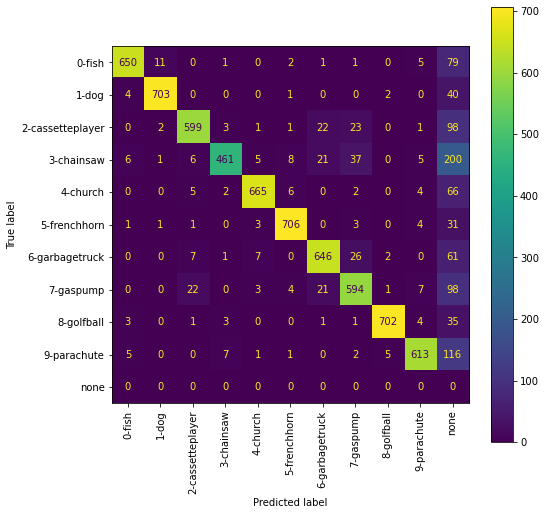

In [427]:
# create "img_answer" column for confusion matrix
# Imagenette Classes
conf_classes = ['0-fish', 
                '1-dog', 
                '2-cassetteplayer', 
                '3-chainsaw',
                '4-church', 
                '5-frenchhorn', 
                '6-garbagetruck', 
                '7-gaspump', 
                '8-golfball', 
                '9-parachute',
                'none']

for label in conf_classes:
    exp2.loc[exp2['Answer.classes.{}'.format(label)] == True, 'img_answer'] = label

# Create Confusion Matrix
cmatrix = confusion_matrix(exp2['img_class'], exp2['img_answer'], labels=conf_classes)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=conf_classes)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(xticks_rotation='vertical', ax=ax)

In [320]:
# Total of 7500 answers
len(exp2)

7500

In [321]:
# Check if every class was answered 750 times
exp2['img_class'].value_counts()

5-frenchhorn        750
6-garbagetruck      750
7-gaspump           750
2-cassetteplayer    750
1-dog               750
4-church            750
8-golfball          750
9-parachute         750
3-chainsaw          750
0-fish              750
Name: img_class, dtype: int64

In [362]:
exp2['Answer.classes.none'].value_counts()

False    6676
True      824
Name: Answer.classes.none, dtype: int64

## Overall: Correct per Class and per Models

In [326]:
# Overview of how many correct per class for all three models, maximum = 750 per class
exp2['img_class'].loc[(exp2['correct'] == 1)].value_counts()

5-frenchhorn        706
1-dog               703
8-golfball          702
4-church            665
0-fish              650
6-garbagetruck      646
9-parachute         613
2-cassetteplayer    599
7-gaspump           594
3-chainsaw          461
Name: img_class, dtype: int64

In [327]:
# Overview of how many correct per model, per model maximum = 2500; total 7500
exp2['algorithm'].loc[(exp2['correct'] == 1)].value_counts()

2pruned.png      2160
nonpruned.png    2146
32pruned.png     2033
Name: algorithm, dtype: int64

In [339]:
# For each class, how many corrects differ between models:
for label in classes:
    print(label)
    print(exp2['algorithm'].loc[(exp2['correct'] == 1) & (exp2['img_class'] == label)].value_counts())

0-fish
2pruned      231
nonpruned    228
32pruned     191
Name: algorithm, dtype: int64
1-dog
32pruned     240
2pruned      238
nonpruned    225
Name: algorithm, dtype: int64
2-cassetteplayer
2pruned      206
nonpruned    199
32pruned     194
Name: algorithm, dtype: int64
3-chainsaw
nonpruned    165
2pruned      165
32pruned     131
Name: algorithm, dtype: int64
4-church
2pruned      231
32pruned     221
nonpruned    213
Name: algorithm, dtype: int64
5-frenchhorn
32pruned     236
nonpruned    235
2pruned      235
Name: algorithm, dtype: int64
6-garbagetruck
2pruned      220
nonpruned    215
32pruned     211
Name: algorithm, dtype: int64
7-gaspump
nonpruned    207
32pruned     197
2pruned      190
Name: algorithm, dtype: int64
8-golfball
2pruned      243
nonpruned    239
32pruned     220
Name: algorithm, dtype: int64
9-parachute
nonpruned    220
2pruned      201
32pruned     192
Name: algorithm, dtype: int64


## Non-Pruned

In [447]:
exp2_np = exp2.loc[exp2['algorithm'] == 'nonpruned']
len(exp2_np)

2500

In [449]:
# Img IDs where Turkers agree least often (maximum 5)
exp2_np.loc[exp2_np['img_id'].apply(lambda x: len(exp2_np.loc[(exp2_np['img_id']==x) & (exp2_np['img_class'] == exp2_np['img_answer'])])) <= 2]['img_id'].unique()

array(['325', '176', '15', '172', '47', '478', '29', '449', '19', '248',
       '460', '204', '486', '499', '158', '106', '219', '357', '107',
       '439', '170', '312', '284', '229', '222', '383', '322', '239',
       '253', '352', '410', '54', '105', '146', '369', '370', '201',
       '108', '304', '342', '60', '313', '339', '119', '56', '43'],
      dtype=object)

In [520]:
# Total correct
len(exp2_np.loc[(exp2_np['correct'] == 1)]), len(exp2_np.loc[(exp2_np['correct'] == 1)]) / len(exp2_np)

(2146, 0.8584)

In [451]:
# Correct answers for non-pruned, splitted by every class, maximum 250 per class
exp2_np['img_class'].loc[(exp2_np['correct'] == 1)].value_counts()

8-golfball          239
5-frenchhorn        235
0-fish              228
1-dog               225
9-parachute         220
6-garbagetruck      215
4-church            213
7-gaspump           207
2-cassetteplayer    199
3-chainsaw          165
Name: img_class, dtype: int64

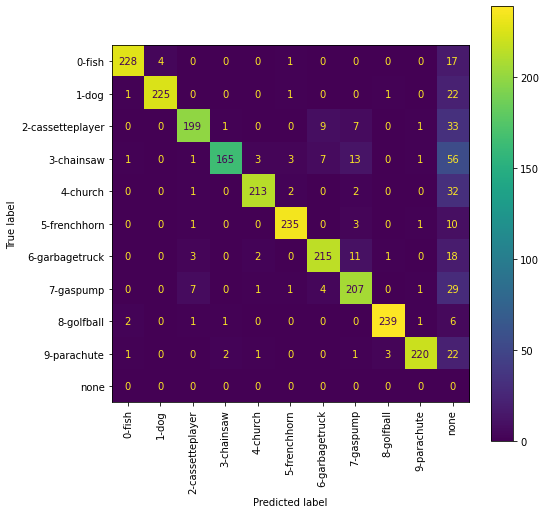

In [515]:
# Create Confusion Matrix
cmatrix = confusion_matrix(exp2_np['img_class'], exp2_np['img_answer'], labels=conf_classes)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=conf_classes)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(xticks_rotation='vertical', ax=ax)

## 2-Pruned

In [450]:
exp2_2p = exp2.loc[exp2['algorithm'] == '2pruned']
len(exp2_2p)

2500

In [452]:
# Img IDs where Turkers agree least often (maximum 5)
exp2_2p.loc[exp2_2p['img_id'].apply(lambda x: len(exp2_2p.loc[(exp2_2p['img_id']==x) & (exp2_2p['img_class'] == exp2_2p['img_answer'])])) <= 2]['img_id'].unique()

array(['219', '172', '222', '460', '439', '388', '239', '119', '242',
       '481', '437', '204', '106', '352', '465', '231', '355', '96',
       '457', '383', '339', '495', '486', '369', '126', '330', '496',
       '136', '313', '284', '105', '183', '478', '427', '83', '252',
       '381', '499', '211', '342', '395', '325', '154', '370', '141',
       '54', '382', '89'], dtype=object)

In [521]:
# Total correct
len(exp2_2p.loc[(exp2_2p['correct'] == 1)]), len(exp2_2p.loc[(exp2_2p['correct'] == 1)]) / len(exp2_2p)

(2160, 0.864)

In [453]:
# Correct answers for 2pruned, splitted by every class, maximum 250 per class
exp2_2p['img_class'].loc[(exp2_2p['correct'] == 1)].value_counts()

8-golfball          243
1-dog               238
5-frenchhorn        235
0-fish              231
4-church            231
6-garbagetruck      220
2-cassetteplayer    206
9-parachute         201
7-gaspump           190
3-chainsaw          165
Name: img_class, dtype: int64

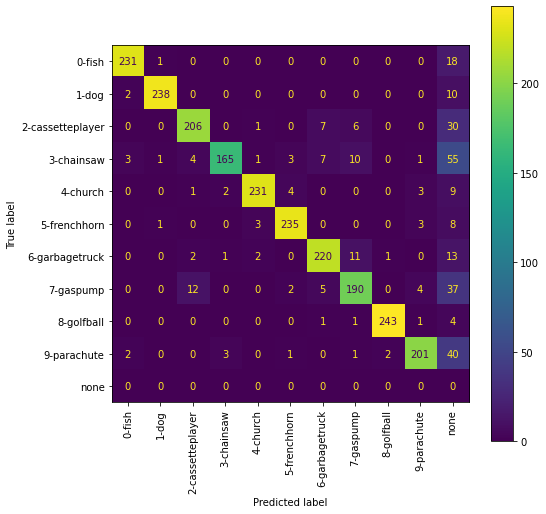

In [516]:
# Create Confusion Matrix
cmatrix = confusion_matrix(exp2_2p['img_class'], exp2_2p['img_answer'], labels=conf_classes)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=conf_classes)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(xticks_rotation='vertical', ax=ax)

## 32pruned

In [456]:
exp2_32p = exp2.loc[exp2['algorithm'] == '32pruned']
len(exp2_32p)

2500

In [458]:
# Img IDs where Turkers agree least often (maximum 5)
exp2_32p.loc[exp2_32p['img_id'].apply(lambda x: len(exp2_32p.loc[(exp2_32p['img_id']==x) & (exp2_32p['img_class'] == exp2_32p['img_answer'])])) <= 2]['img_id'].unique()

array(['382', '313', '302', '439', '372', '201', '388', '229', '104',
       '410', '438', '67', '263', '274', '177', '60', '174', '225', '39',
       '318', '456', '485', '383', '203', '480', '50', '405', '417',
       '164', '330', '369', '54', '173', '122', '339', '347', '481',
       '366', '20', '153', '81', '154', '273', '457', '293', '248', '319',
       '322', '486', '89', '355', '325', '499', '331', '105', '239',
       '309', '115', '350', '312', '264', '352', '189', '46', '15'],
      dtype=object)

In [522]:
# Total correct
len(exp2_32p.loc[(exp2_32p['correct'] == 1)]), len(exp2_32p.loc[(exp2_32p['correct'] == 1)]) / len(exp2_32p)

(2033, 0.8132)

In [459]:
# Correct answers for 32pruned, splitted by every class, maximum 250 per class
exp2_32p['img_class'].loc[(exp2_32p['correct'] == 1)].value_counts()

1-dog               240
5-frenchhorn        236
4-church            221
8-golfball          220
6-garbagetruck      211
7-gaspump           197
2-cassetteplayer    194
9-parachute         192
0-fish              191
3-chainsaw          131
Name: img_class, dtype: int64

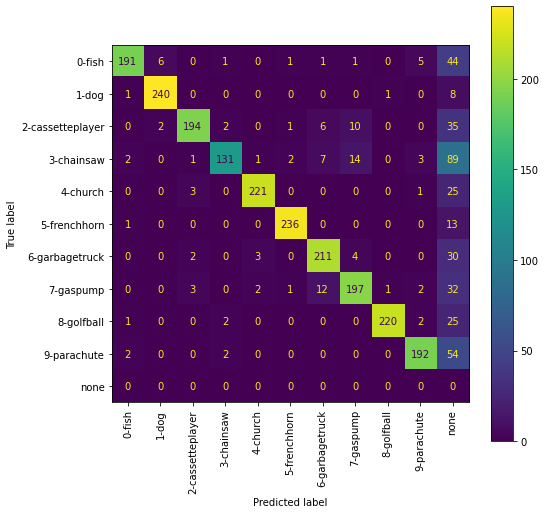

In [518]:
# Create Confusion Matrix
cmatrix = confusion_matrix(exp2_32p['img_class'], exp2_32p['img_answer'], labels=conf_classes)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=conf_classes)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(xticks_rotation='vertical', ax=ax)

In [528]:
# Chisquare: Whether correct results are significant:
# correct for 2pruned, 32pruned - expected: as much correct as in nonpruned
chisquare([2160, 2033], [2046, 2046])

Power_divergenceResult(statistic=6.434506353861193, pvalue=0.011192425842613596)